#Exercise : DNN - Boston data

Conduct the DNN analysis using the boston dataset.You are required to improve the performance of the model using different archictecture. 

https://keras.io/api/datasets/boston_housing/

In [133]:
from keras.datasets import boston_housing

#loading the dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=113)

In [134]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (404, 13)
y_train shape (404,)
X_test shape (102, 13)
y_test shape (102,)


In [135]:
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [136]:
#Building a Linear stack of layers with the Sequential Model

L1=300
L2=200
L3=50

model0 = Sequential()
model0.add(Dense(L1, input_dim=13, activation ='relu'))
model0.add(Dense(L2, activation = 'relu'))
model0.add(Dense(L3, activation='relu'))

#Output Layer 
model0.add(Dense(1, activation ='linear'))

In [137]:
#Compiling the Sequential Model
model0.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')

In [138]:
#Training the model
history0 = model0.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/20
5/5 [==============================] - 1s 88ms/step - loss: 2182.5107 - mae: 35.4697 - val_loss: 74.4551 - val_mae: 6.4450
Epoch 2/20
5/5 [==============================] - 0s 24ms/step - loss: 72.9777 - mae: 6.2347 - val_loss: 137.1938 - val_mae: 8.9319
Epoch 3/20
5/5 [==============================] - 0s 26ms/step - loss: 84.2563 - mae: 6.7228 - val_loss: 77.5015 - val_mae: 7.3371
Epoch 4/20
5/5 [==============================] - 0s 23ms/step - loss: 80.9211 - mae: 6.5523 - val_loss: 69.6273 - val_mae: 5.7625
Epoch 5/20
5/5 [==============================] - 0s 17ms/step - loss: 68.4537 - mae: 5.9653 - val_loss: 87.6193 - val_mae: 6.9173
Epoch 6/20
5/5 [==============================] - 0s 17ms/step - loss: 181.6084 - mae: 11.1662 - val_loss: 468.2180 - val_mae: 17.3610
Epoch 7/20
5/5 [==============================] - 0s 14ms/step - loss: 179.9736 - mae: 9.8119 - val_loss: 103.4777 - val_mae: 7.4436
Epoch 8/20
5/5 [==============================] - 0s 14ms/step - loss: 92

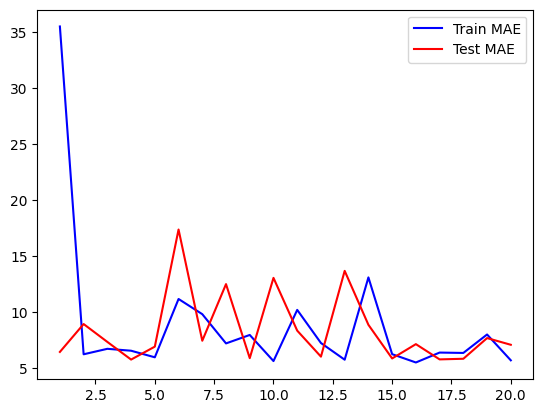

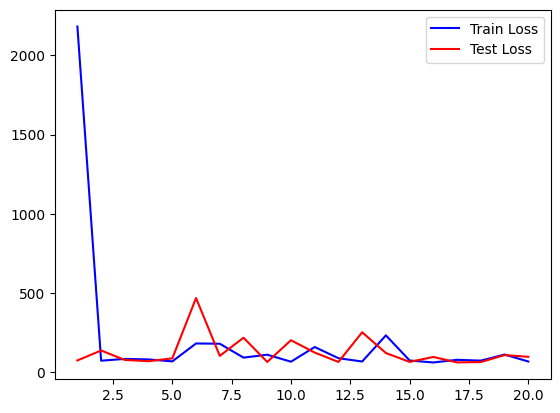

In [139]:
import matplotlib.pyplot as plt

acc2 = history0.history['mae']
val_acc = history0.history['val_mae']
loss2 = history0.history['loss']
val_loss = history0.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.plot(epochs, acc2,'b',label='Train MAE')
plt.plot(epochs, val_acc,'r',label='Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

## Model with Initializer & Regularizer

In [140]:
from keras import initializers
from keras import regularizers

In [141]:
L1=300
L2=200
L3=50

model1 = Sequential()
model1.add(Dense(L1, input_dim=13, activation ='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model1.add(Dense(L2, activation = 'relu'))
model1.add(Dense(L3, activation='relu'))

#Output Layer
model1.add(Dense(1, activation ='linear'))

In [142]:
#Compiling the Sequential Model
model1.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')

In [143]:
#Training the model
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=350, validation_data=(X_test, y_test))

Epoch 1/20
2/2 [==============================] - 2s 235ms/step - loss: 56093.5977 - mae: 223.5099 - val_loss: 3617.8076 - val_mae: 58.1153
Epoch 2/20
2/2 [==============================] - 0s 56ms/step - loss: 3155.7913 - mae: 52.3579 - val_loss: 786.6008 - val_mae: 25.7084
Epoch 3/20
2/2 [==============================] - 0s 63ms/step - loss: 715.3311 - mae: 23.5651 - val_loss: 163.7236 - val_mae: 10.2440
Epoch 4/20
2/2 [==============================] - 0s 62ms/step - loss: 170.7860 - mae: 10.0892 - val_loss: 155.7355 - val_mae: 9.8183
Epoch 5/20
2/2 [==============================] - 0s 56ms/step - loss: 159.0846 - mae: 9.5786 - val_loss: 158.1147 - val_mae: 9.9287
Epoch 6/20
2/2 [==============================] - 0s 56ms/step - loss: 160.4886 - mae: 9.6193 - val_loss: 170.9707 - val_mae: 10.3969
Epoch 7/20
2/2 [==============================] - 0s 55ms/step - loss: 164.2420 - mae: 9.9751 - val_loss: 130.1236 - val_mae: 8.7733
Epoch 8/20
2/2 [==============================] - 0s 37

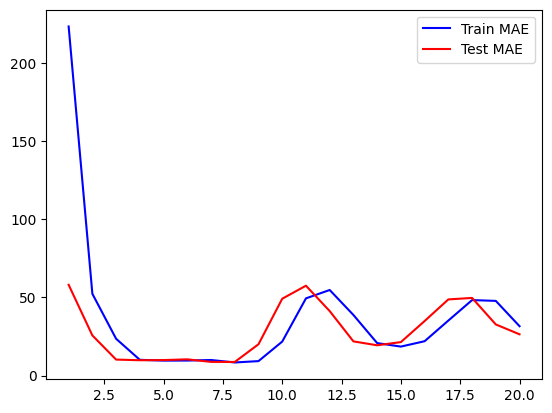

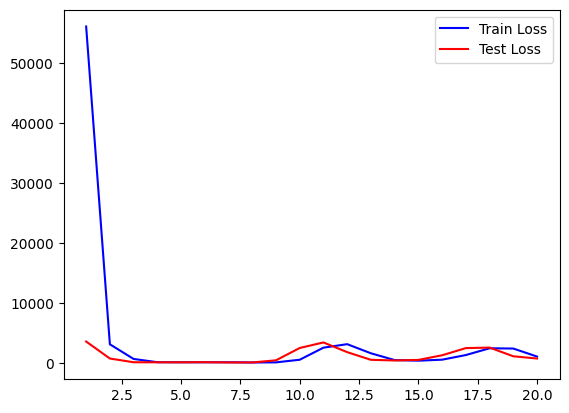

In [144]:
acc2 = history1.history['mae']
val_acc = history1.history['val_mae']
loss2 = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.plot(epochs, acc2,'b',label='Train MAE')
plt.plot(epochs, val_acc,'r',label='Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

## Dropout

In [145]:
from keras.layers import Dense, Dropout

In [146]:
L1=300
L2=200
L3=50

model2 = Sequential()
model2.add(Dense(L1, input_dim = 13, activation = 'relu'))
model2.add(Dropout(rate = 0.2))
model2.add(Dense(L2, activation= 'relu'))
model2.add(Dropout(rate = 0.2))
model2.add(Dense(L3, activation= 'relu'))
model2.add(Dropout(rate = 0.2))

#Output Layer
model2.add(Dense(1, activation ='linear'))

In [147]:
#Compiling the Sequential Model
model2.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')

In [148]:
#Training the model
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/20
5/5 [==============================] - 1s 53ms/step - loss: 1385.3060 - mae: 28.3402 - val_loss: 101.1923 - val_mae: 7.8429
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 213.9422 - mae: 11.3924 - val_loss: 90.1314 - val_mae: 6.7090
Epoch 3/20
5/5 [==============================] - 0s 19ms/step - loss: 172.0352 - mae: 9.8912 - val_loss: 334.9216 - val_mae: 16.1962
Epoch 4/20
5/5 [==============================] - 0s 21ms/step - loss: 182.1644 - mae: 10.3690 - val_loss: 148.6620 - val_mae: 9.5835
Epoch 5/20
5/5 [==============================] - 0s 19ms/step - loss: 147.3388 - mae: 9.3391 - val_loss: 79.7054 - val_mae: 6.3640
Epoch 6/20
5/5 [==============================] - 0s 15ms/step - loss: 122.0920 - mae: 8.4704 - val_loss: 72.7849 - val_mae: 6.2359
Epoch 7/20
5/5 [==============================] - 0s 18ms/step - loss: 124.1735 - mae: 8.5462 - val_loss: 148.5200 - val_mae: 9.6219
Epoch 8/20
5/5 [==============================] - 0s 20ms/step - lo

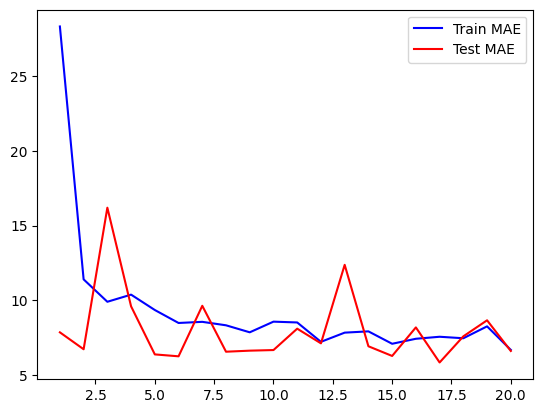

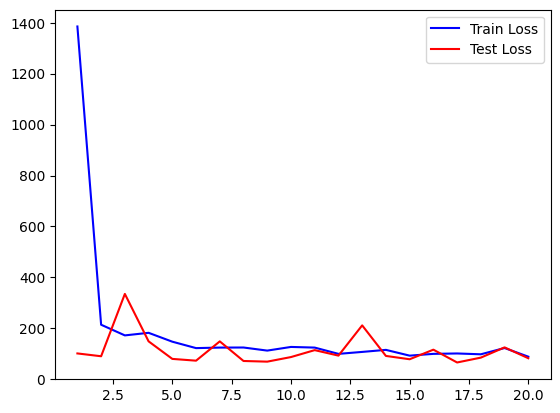

In [149]:
acc2 = history2.history['mae']
val_acc = history2.history['val_mae']
loss2 = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.plot(epochs, acc2,'b',label='Train MAE')
plt.plot(epochs, val_acc,'r',label='Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

## Early Stopping

In [150]:
from keras.callbacks import EarlyStopping

In [151]:
L1=300
L2=200
L3=50

model3 = Sequential()
model3.add(Dense(L1, input_dim = 13, activation = 'relu'))
model3.add(Dropout(rate = 0.2))
model3.add(Dense(L2, activation= 'relu'))
model3.add(Dropout(rate = 0.2))
model3.add(Dense(L3, activation= 'relu'))
model3.add(Dropout(rate = 0.2))

#Output Layer
model3.add(Dense(1, activation ='linear'))

In [152]:
#Compiling the Sequential Model
model3.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')

In [153]:
early_stopping_monitor = EarlyStopping(patience= 6)

#Training the modelfor 10 Epochs
history3 = model3.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_test, y_test), callbacks=[early_stopping_monitor])

Epoch 1/20
5/5 [==============================] - 1s 56ms/step - loss: 4550.8799 - mae: 47.0628 - val_loss: 93.8269 - val_mae: 7.3106
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 416.6902 - mae: 16.0943 - val_loss: 80.0255 - val_mae: 7.1703
Epoch 3/20
5/5 [==============================] - 0s 16ms/step - loss: 300.9157 - mae: 13.8399 - val_loss: 254.3539 - val_mae: 13.3947
Epoch 4/20
5/5 [==============================] - 0s 19ms/step - loss: 244.5266 - mae: 12.0688 - val_loss: 331.7018 - val_mae: 15.1407
Epoch 5/20
5/5 [==============================] - 0s 25ms/step - loss: 190.2294 - mae: 10.9659 - val_loss: 132.4665 - val_mae: 8.8557
Epoch 6/20
5/5 [==============================] - 0s 25ms/step - loss: 159.8865 - mae: 9.7636 - val_loss: 80.0693 - val_mae: 6.4619
Epoch 7/20
5/5 [==============================] - 0s 22ms/step - loss: 132.5707 - mae: 8.8735 - val_loss: 80.2475 - val_mae: 7.4297
Epoch 8/20
5/5 [==============================] - 0s 27ms/step - 

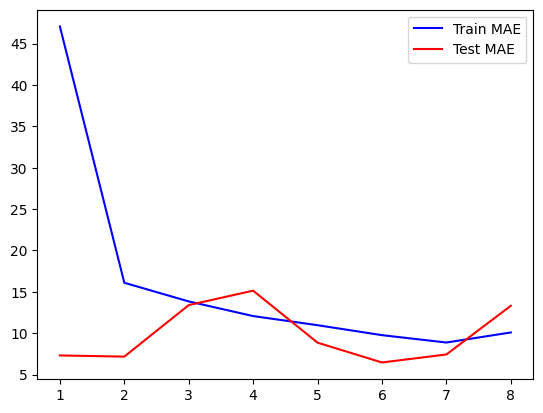

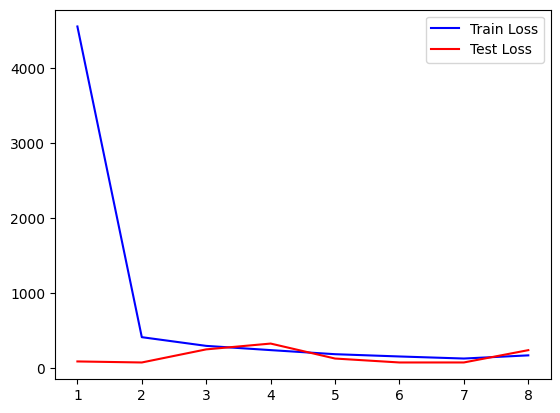

In [154]:
acc2 = history3.history['mae']
val_acc = history3.history['val_mae']
loss2 = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.plot(epochs, acc2,'b',label='Train MAE')
plt.plot(epochs, val_acc,'r',label='Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

## Grid Search Hyperparameters

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [155]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [156]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor 

In [157]:
#Function to create model
def create_model():
  model4 = Sequential()
  model4.add(Dense(300, input_dim = 13, activation = 'relu'))
  model4.add(Dense(200, activation= 'relu'))
  model4.add(Dense(50, activation= 'relu'))
  model4.add(Dense(10, activation= 'relu'))

  #Output layer
  model4.add(Dense(1, activation= 'linear'))

  #Compiling the sequantial model
  model4.compile(loss = 'mse', metrics = ['mae'], optimizer = 'rmsprop')

  return model4

## Tune the Batch Size and Epoch

In [158]:
#Create Model
model4 = KerasRegressor(model=create_model, 
                        loss = 'mse', 
                        verbose=0)

#Define the Grid Search Parameters
batch_size=[100, 150, 200, 300]
epochs = [10, 15, 20, 25]

param_grid = dict(batch_size=batch_size, 
                  epochs = epochs)

grid = GridSearchCV (estimator = model4, 
                     param_grid=param_grid, 
                     n_jobs=-1, 
                     cv=3)

grid_result = grid.fit(X_train, y_train)

In [159]:
#Summarize Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.205107 using {'batch_size': 300, 'epochs': 10}
0.057375 (0.181138) with: {'batch_size': 100, 'epochs': 10}
-0.191286 (0.260721) with: {'batch_size': 100, 'epochs': 15}
-0.066681 (0.561513) with: {'batch_size': 100, 'epochs': 20}
-0.097468 (0.340292) with: {'batch_size': 100, 'epochs': 25}
-2.354300 (2.457787) with: {'batch_size': 150, 'epochs': 10}
-0.125648 (0.390674) with: {'batch_size': 150, 'epochs': 15}
-0.069520 (0.219802) with: {'batch_size': 150, 'epochs': 20}
0.000762 (0.359669) with: {'batch_size': 150, 'epochs': 25}
-1.121571 (1.778404) with: {'batch_size': 200, 'epochs': 10}
-0.898955 (1.008361) with: {'batch_size': 200, 'epochs': 15}
0.101597 (0.146143) with: {'batch_size': 200, 'epochs': 20}
0.170772 (0.030218) with: {'batch_size': 200, 'epochs': 25}
0.205107 (0.027877) with: {'batch_size': 300, 'epochs': 10}
0.152321 (0.051888) with: {'batch_size': 300, 'epochs': 15}
-0.116388 (0.133772) with: {'batch_size': 300, 'epochs': 20}
0.128510 (0.089897) with: {'batch_si

#Tune the training Optimization Algorithm (only)

In [160]:
#Create Model
model5 = KerasRegressor(model = create_model,
                        loss = 'mse',
                         epochs = 25, batch_size = 150, verbose = 0)

#define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

param_grid =  dict(optimizer = optimizer)

grid2 = GridSearchCV(estimator = model5,
                    param_grid = param_grid,
                    n_jobs = -1, cv = 3)

grid_result2 = grid2.fit(X_train, y_train)

In [161]:
#Summarize result
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.173133 using {'optimizer': 'RMSprop'}
0.120154 (0.193547) with: {'optimizer': 'SGD'}
0.173133 (0.162977) with: {'optimizer': 'RMSprop'}
0.068228 (0.134846) with: {'optimizer': 'Adagrad'}
-0.239689 (0.561304) with: {'optimizer': 'Adadelta'}
-0.804558 (0.485283) with: {'optimizer': 'Adam'}
0.014641 (0.179342) with: {'optimizer': 'Adamax'}
-0.325380 (0.445429) with: {'optimizer': 'Nadam'}


#Tune the Neuron Activation Function

In [162]:
#Building a linear stack of layers with the sequantial model
def create_model2(activation = 'relu'):
  model4 = Sequential()
  model4.add(Dense(300, input_dim = 13, activation = activation))
  model4.add(Dense(200, activation = activation))
  model4.add(Dense(50, activation = activation))
  model4.add(Dense(10, activation = activation))

  #output layer (Softmax = multinominal)* because of multiclass
  model4.add(Dense(1, activation= 'linear'))

  #Compiling the sequantial model
  model4.compile(loss = 'mse', metrics = ['mae'], optimizer = 'RMSprop')

  return model4

In [163]:
#Create Model
model6 = KerasRegressor(model = create_model2,
                        loss = 'mse',
                         epochs = 25, batch_size = 150, verbose = 0)

#Define the grid search parameters
activation = ['elu', 'selu', 'relu', 'softmax', 'tanh']

param_grid =  dict(model__activation  = activation)

grid3 = GridSearchCV(estimator = model6,
                    param_grid = param_grid,
                    n_jobs = -1, cv = 3)

grid_result3 = grid3.fit(X_train, y_train)

In [164]:
#Summarize result
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score']
stds3 = grid_result3.cv_results_['std_test_score']
params3 = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.121953 using {'model__activation': 'elu'}
0.121953 (0.119380) with: {'model__activation': 'elu'}
-1.141576 (0.372312) with: {'model__activation': 'selu'}
-0.587376 (0.897246) with: {'model__activation': 'relu'}
-6.157504 (1.140193) with: {'model__activation': 'softmax'}
-4.003525 (0.534118) with: {'model__activation': 'tanh'}


#Final Model

In [168]:
#Final
modelf = Sequential()
modelf.add(Dense(300, input_dim = 13, activation = 'elu'))
modelf.add(Dense(200, activation= 'elu'))
modelf.add(Dense(50, activation= 'elu'))
modelf.add(Dense(10, activation= 'elu'))

#Output layer
modelf.add(Dense(1, activation= 'linear'))

#Compiling the sequantial model
modelf.compile(loss = 'mse', metrics = ['mae'], optimizer = 'RMSprop')

In [169]:
early_stopping_monitor =EarlyStopping(patience = 6)

historyf = modelf.fit(X_train, y_train, epochs =10, batch_size = 300, validation_data = (X_test, y_test), callbacks= [early_stopping_monitor])

Epoch 1/10
2/2 [==============================] - 1s 216ms/step - loss: 2627.1519 - mae: 46.9158 - val_loss: 382.4446 - val_mae: 16.6414
Epoch 2/10
2/2 [==============================] - 0s 37ms/step - loss: 320.7672 - mae: 14.9477 - val_loss: 122.2040 - val_mae: 8.2616
Epoch 3/10
2/2 [==============================] - 0s 38ms/step - loss: 105.4192 - mae: 7.4054 - val_loss: 86.6338 - val_mae: 6.9246
Epoch 4/10
2/2 [==============================] - 0s 53ms/step - loss: 79.2373 - mae: 6.2799 - val_loss: 75.0300 - val_mae: 6.3537
Epoch 5/10
2/2 [==============================] - 0s 40ms/step - loss: 72.6324 - mae: 5.9203 - val_loss: 77.1070 - val_mae: 6.9016
Epoch 6/10
2/2 [==============================] - 0s 56ms/step - loss: 76.2967 - mae: 6.6733 - val_loss: 71.1869 - val_mae: 6.5201
Epoch 7/10
2/2 [==============================] - 0s 37ms/step - loss: 72.9550 - mae: 6.3064 - val_loss: 75.4405 - val_mae: 6.9520
Epoch 8/10
2/2 [==============================] - 0s 55ms/step - loss: 72

<Figure size 640x480 with 0 Axes>

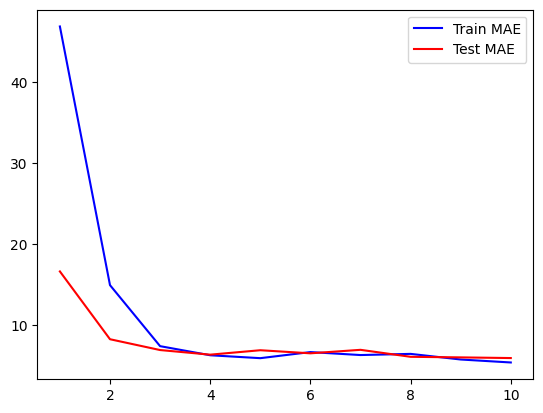

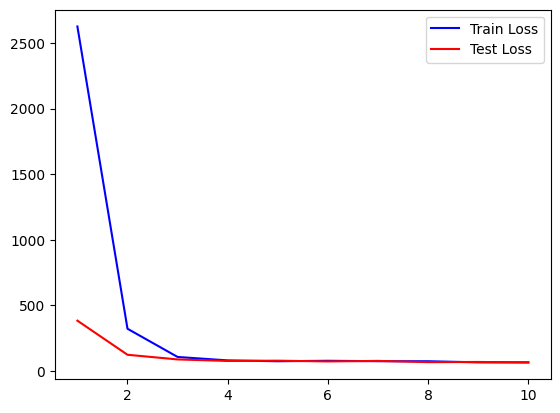

<Figure size 640x480 with 0 Axes>

In [170]:
import matplotlib.pyplot as plt

mae2 = historyf.history['mae']
val_mae = historyf.history['val_mae']
loss2 = historyf.history['loss']
val_loss = historyf.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train MAE')
plt.plot(epochs, val_mae, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()